In [3]:
import pandas as pd

## Dataset Description

Attributes

id: represents a unique identifier for each participant or record in the dataset.
Gender: Represents the gender of the individual.
Age: Indicates the age of the individual.
Height - Represents the height of the individual.
Weight: Represents the weight of the individual.
FCVC Frequency of Consumption of Vegetables
NCP - Number of Main Meals per Day
SMOKE - Indicates whether the individual smokes
CH2O - Consumption of Water
TUE - Time Using Electronic Devices
MTRANS - Mode of Transportation
NObeyesdad - Nutritional Obesity Status, obesity class
Target variable

FAF Frequency of Physical Activity

In [4]:
data = pd.read_csv("./data/obesity.csv")

In [7]:
data.sample(5)

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
13255,13255,13255.0,NaN,21.000000,NaN,75.000000,2.000000,3.000000,no,1.000000,0.0,NaN,Automobile,Overweight_Level_I
9457,9457,9457.0,NaN,NaN,1.596586,44.845655,2.000000,1.000000,no,2.566629,NaN,0.000000,NaN,Insufficient_Weight
14193,14193,14193.0,Male,25.955361,1.772190,114.133149,2.175276,3.000000,NaN,2.109697,NaN,NaN,NaN,Obesity_Type_II
10845,10845,10845.0,Male,18.000000,1.801478,108.897324,2.000000,2.113575,no,2.514872,NaN,1.099764,Public_Transportation,Obesity_Type_I
12844,12844,12844.0,Female,17.000000,1.630000,65.000000,NaN,4.000000,NaN,NaN,1.0,NaN,Public_Transportation,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20758 non-null  int64  
 1   id          16618 non-null  float64
 2   Gender      16634 non-null  object 
 3   Age         16608 non-null  float64
 4   Height      16667 non-null  float64
 5   Weight      16477 non-null  float64
 6   FCVC        16641 non-null  float64
 7   NCP         16697 non-null  float64
 8   SMOKE       16648 non-null  object 
 9   CH2O        16597 non-null  float64
 10  FAF         16619 non-null  float64
 11  TUE         16611 non-null  float64
 12  MTRANS      16600 non-null  object 
 13  NObeyesdad  16625 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.2+ MB


In [12]:
data.FAF.nunique()

1291

In [15]:
# prvo label Encoder kategoriski vo numericki
from sklearn.preprocessing import LabelEncoder



## Explore the dataset with visualisations

In [16]:
data_copy = data.copy()

In [18]:
encoder = LabelEncoder()

for col in ['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']:
    data_copy[col] = encoder.fit_transform(data_copy[col])


In [19]:
data_copy.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,1,24.443011,1.699998,81.669950,2.0,2.983297,0,2.763573,0.000000,0.976473,3,7
1,1,1.0,0,18.000000,1.560000,57.000000,2.0,3.000000,0,NaN,NaN,1.000000,0,1
2,2,2.0,0,18.000000,NaN,50.165754,NaN,1.411685,0,NaN,0.866045,NaN,3,0
3,3,3.0,2,20.952737,1.710730,131.274851,3.0,3.000000,0,1.674061,1.467863,0.780199,3,7
4,4,NaN,1,31.641081,1.914186,NaN,NaN,1.971472,0,NaN,1.967973,0.931721,3,6


In [21]:
# posle toa gledame dali imalo null vrednosti vo tie kategorii
data.isnull().sum()

Unnamed: 0       0
id            4140
Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [ ]:
# imalo, pa zatoa vo data_copy gi menuvame so np.nan; zosto vaka tie nan vrednosti ni se so label encoder

In [26]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [24]:
data_copy.Gender
# od tuka se gleda deka NaN -> 2

0        1
1        0
2        0
3        2
4        1
        ..
20753    2
20754    1
20755    1
20756    2
20757    1
Name: Gender, Length: 20758, dtype: int64

In [27]:
import numpy as np
data_copy.Gender = data_copy.Gender.replace(2, np.nan)
data_copy.Gender.unique()


array([ 1.,  0., nan])

In [29]:
# istoto go pravime i za SMOKE, MTRANS, NObeyesdad

print("SMOKE")
print(data_copy.SMOKE.unique())
print(data.SMOKE.unique())

print("MTRANS")
print(data_copy.MTRANS.unique())
print(data.MTRANS.unique())


print("NObeyesdad")
print(data_copy.NObeyesdad.unique())
print(data.NObeyesdad.unique())


SMOKE
[0 2 1]
['no' nan 'yes']
MTRANS
[3 0 5 4 2 1]
['Public_Transportation' 'Automobile' nan 'Walking' 'Motorbike' 'Bike']
NObeyesdad
[7 1 0 6 3 5 2 4]
[nan 'Normal_Weight' 'Insufficient_Weight' 'Overweight_Level_II'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I'
 'Obesity_Type_III']


In [30]:
data_copy.SMOKE = data_copy.SMOKE.replace(2, np.nan)
data_copy.MTRANS = data_copy.MTRANS.replace(5, np.nan)
data_copy.NObeyesdad = data_copy.NObeyesdad.replace(7, np.nan)

In [31]:
print(data_copy.SMOKE.unique())
print(data_copy.MTRANS.unique())
print(data_copy.NObeyesdad.unique())

[ 0. nan  1.]
[ 3.  0. nan  4.  2.  1.]
[nan  1.  0.  6.  3.  5.  2.  4.]


In [33]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20758 non-null  int64  
 1   id          16618 non-null  float64
 2   Gender      16634 non-null  float64
 3   Age         16608 non-null  float64
 4   Height      16667 non-null  float64
 5   Weight      16477 non-null  float64
 6   FCVC        16641 non-null  float64
 7   NCP         16697 non-null  float64
 8   SMOKE       16648 non-null  float64
 9   CH2O        16597 non-null  float64
 10  FAF         16619 non-null  float64
 11  TUE         16611 non-null  float64
 12  MTRANS      16600 non-null  float64
 13  NObeyesdad  16625 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 2.2 MB


In [34]:
data_copy.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,1.0,24.443011,1.699998,81.669950,2.0,2.983297,0.0,2.763573,0.000000,0.976473,3.0,NaN
1,1,1.0,0.0,18.000000,1.560000,57.000000,2.0,3.000000,0.0,NaN,NaN,1.000000,0.0,1.0
2,2,2.0,0.0,18.000000,NaN,50.165754,NaN,1.411685,0.0,NaN,0.866045,NaN,3.0,0.0
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.0,3.000000,0.0,1.674061,1.467863,0.780199,3.0,NaN
4,4,NaN,1.0,31.641081,1.914186,NaN,NaN,1.971472,0.0,NaN,1.967973,0.931721,3.0,6.0


In [35]:
data_copy = data_copy.drop('Unnamed: 0', axis=1)
data_copy = data_copy.drop('id', axis=1)

In [36]:
data_copy.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,1.0,24.443011,1.699998,81.669950,2.0,2.983297,0.0,2.763573,0.000000,0.976473,3.0,NaN
1,0.0,18.000000,1.560000,57.000000,2.0,3.000000,0.0,NaN,NaN,1.000000,0.0,1.0
2,0.0,18.000000,NaN,50.165754,NaN,1.411685,0.0,NaN,0.866045,NaN,3.0,0.0
3,NaN,20.952737,1.710730,131.274851,3.0,3.000000,0.0,1.674061,1.467863,0.780199,3.0,NaN
4,1.0,31.641081,1.914186,NaN,NaN,1.971472,0.0,NaN,1.967973,0.931721,3.0,6.0


In [37]:
import seaborn as sns

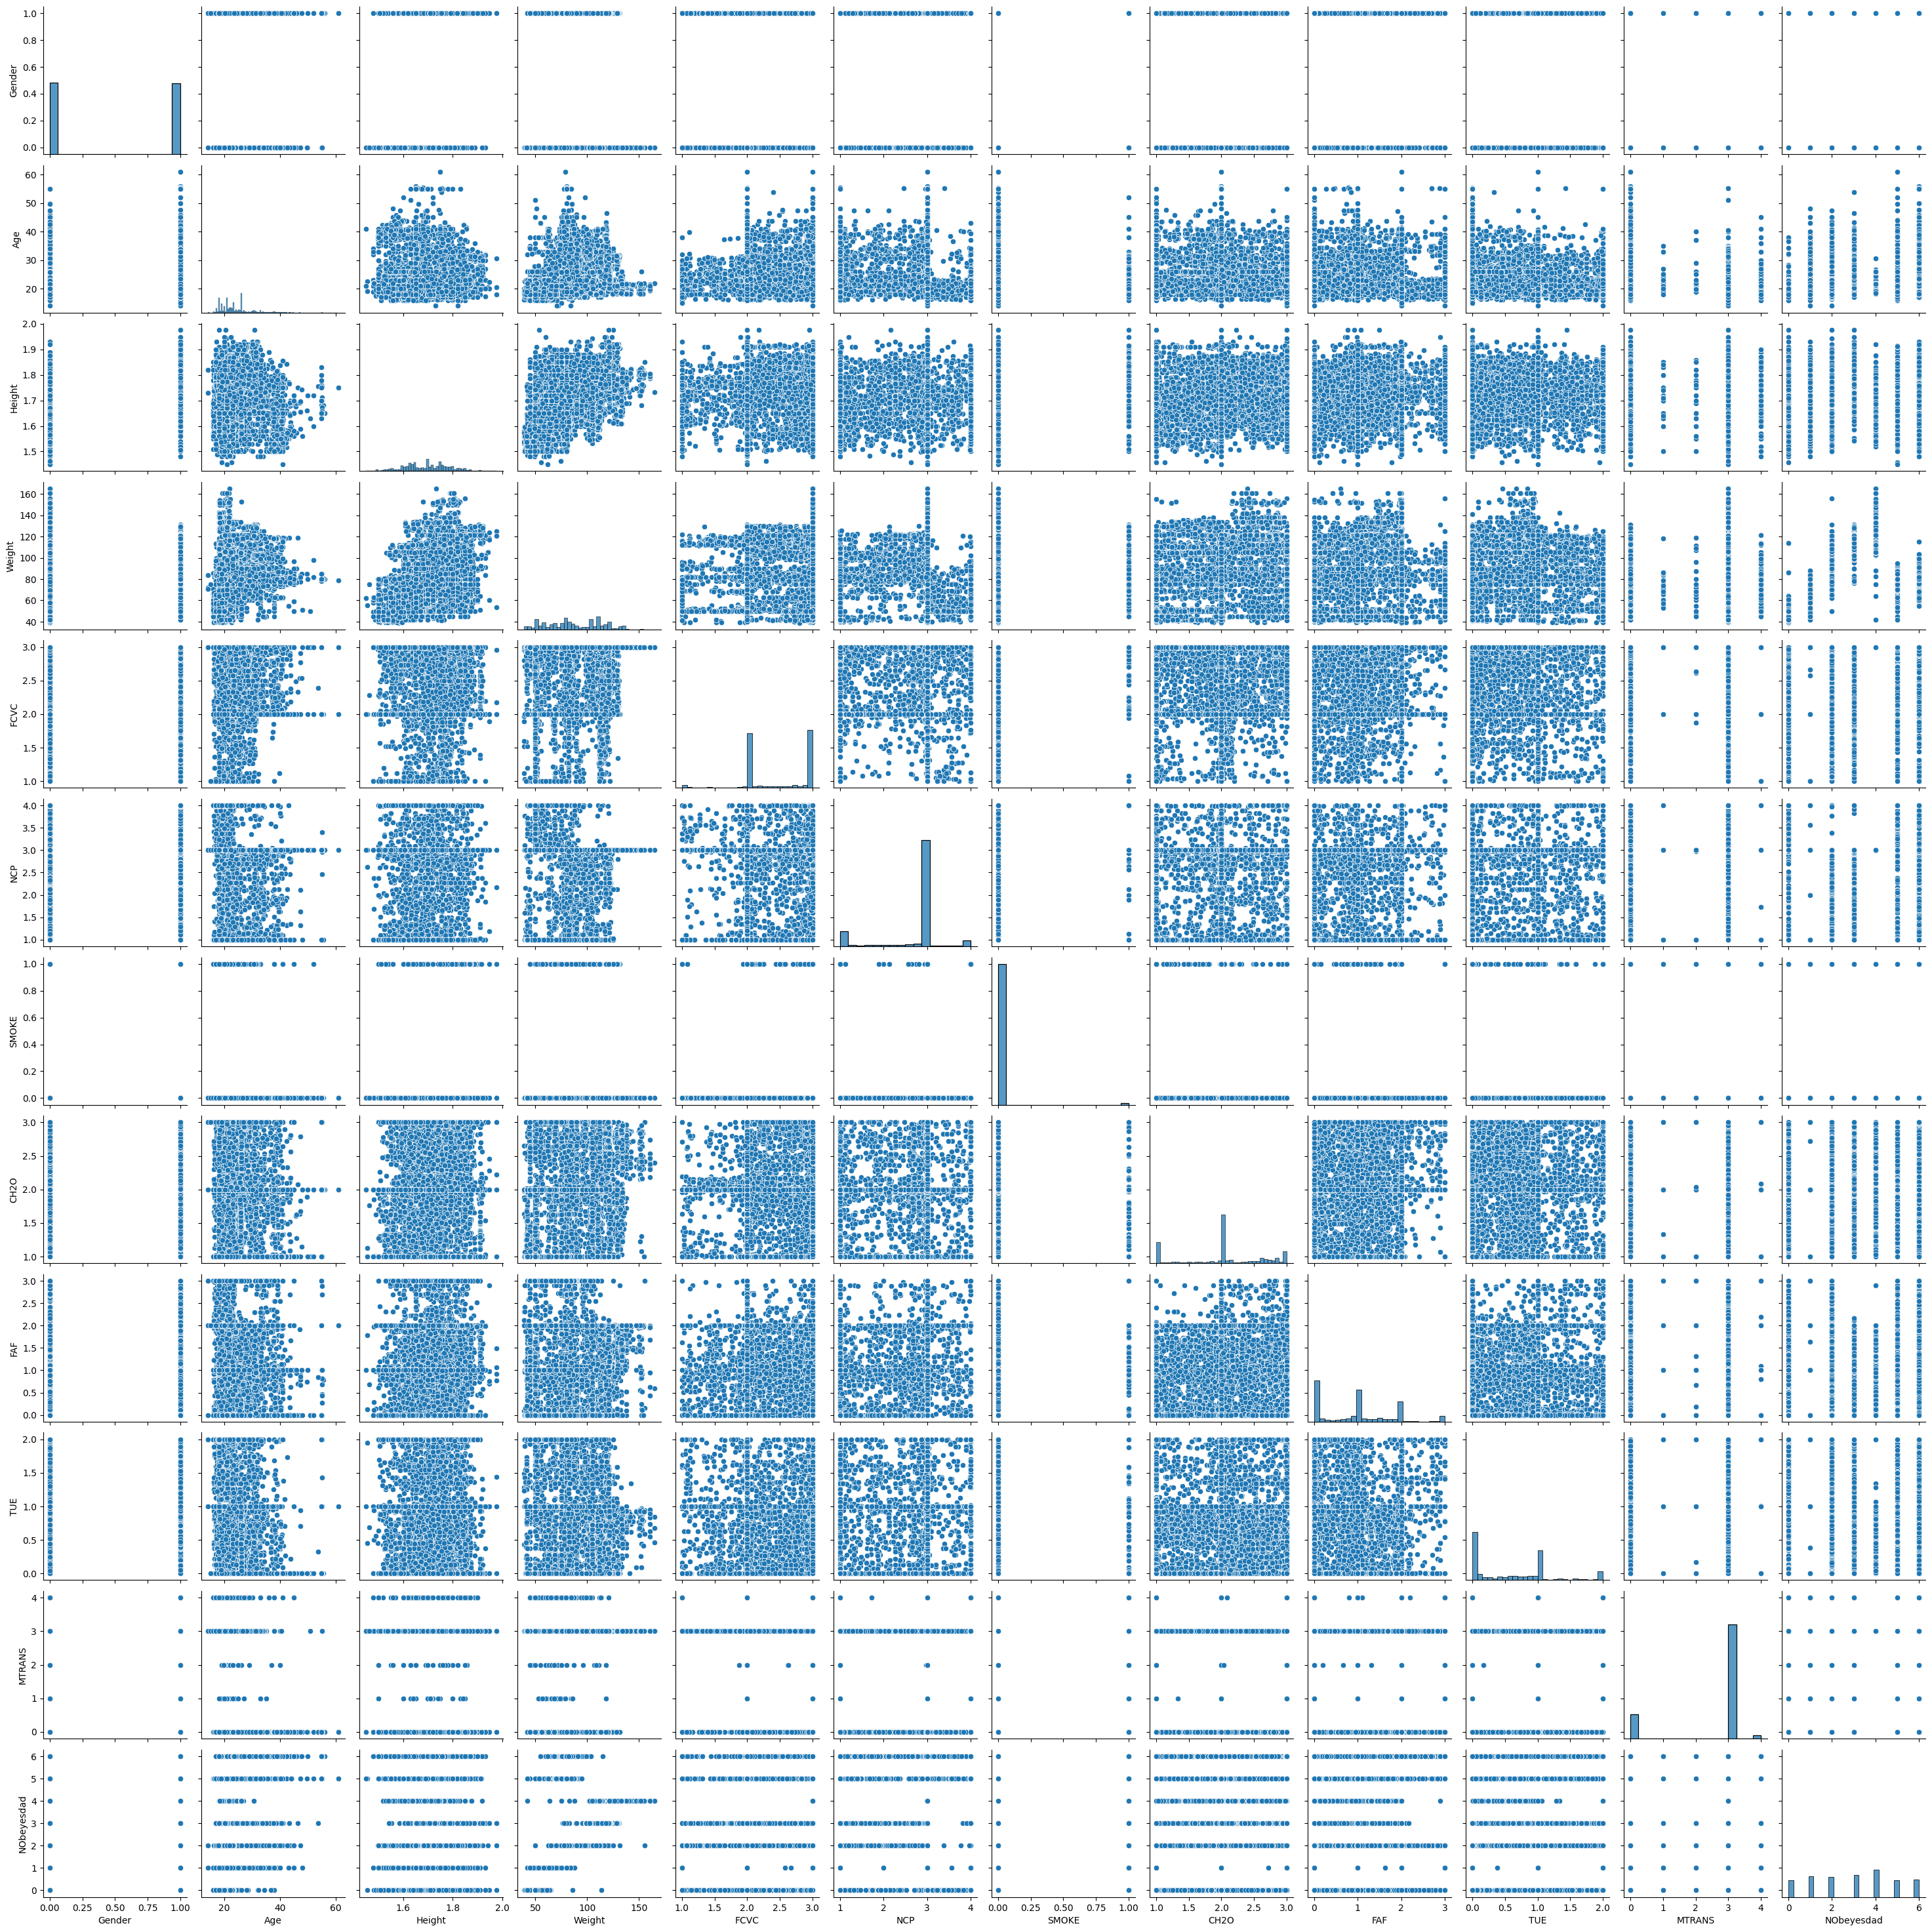

In [38]:
sns.pairplot(data_copy)

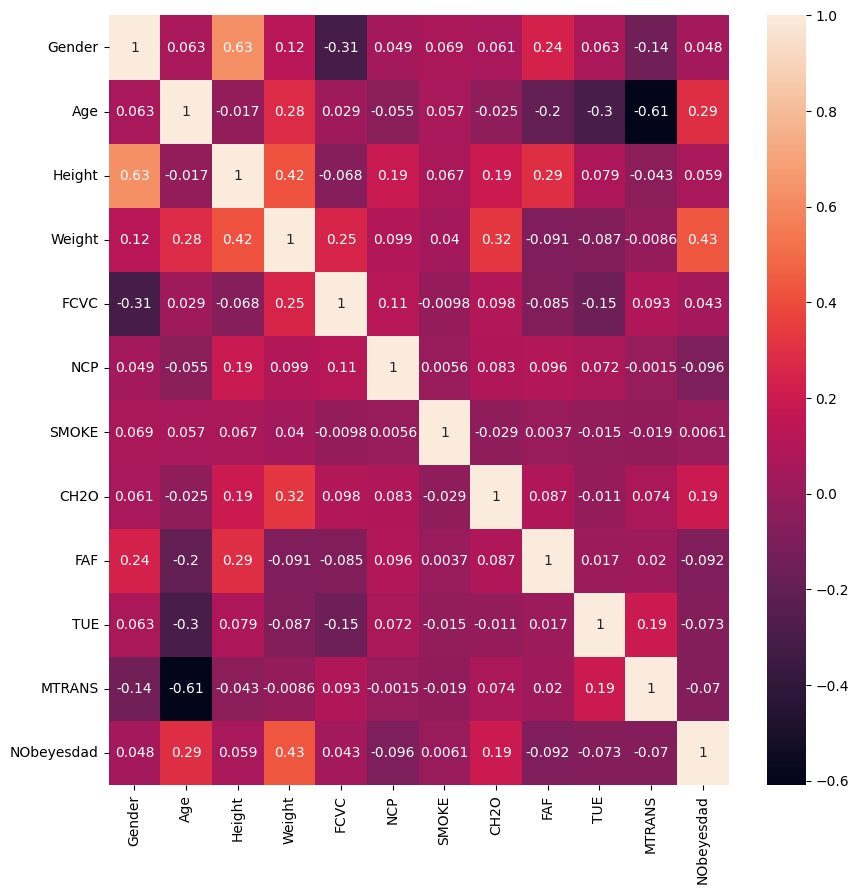

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(data_copy.corr(), annot=True)
plt.show()

In [ ]:
# moze da se zabelezi deka im visoka zavisnost megju gender i height

<Axes: >

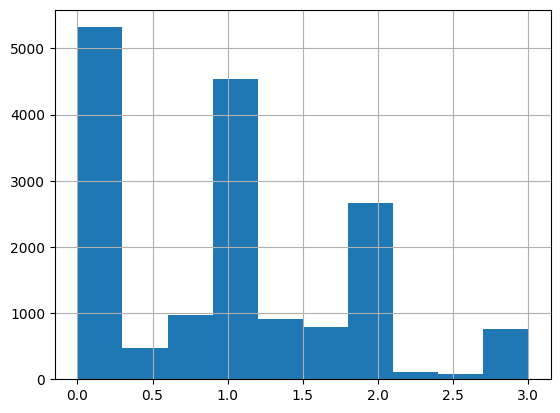

In [44]:
#data.FAF.unique()
data.FAF.hist()

## Detecting Missing Values

In [45]:
data_copy.isnull().sum()

Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [50]:
# na target kolonata ne treba da se input nan vrednosti pa zatoa pavi drop na nan
data_copy = data_copy.dropna(subset=['FAF'], axis=0)
data_copy

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,1.0,24.443011,1.699998,81.669950,2.000000,2.983297,0.0,2.763573,0.000000,0.976473,3.0,NaN
2,0.0,18.000000,NaN,50.165754,NaN,1.411685,0.0,NaN,0.866045,NaN,3.0,0.0
3,NaN,20.952737,1.710730,131.274851,3.000000,3.000000,0.0,1.674061,1.467863,0.780199,3.0,NaN
4,1.0,31.641081,1.914186,NaN,NaN,1.971472,0.0,NaN,1.967973,0.931721,3.0,6.0
5,1.0,18.128249,1.748524,51.552595,2.919751,3.000000,0.0,2.137550,1.930033,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20752,0.0,40.000000,NaN,77.561602,NaN,NaN,0.0,1.131169,0.281734,0.522259,NaN,2.0
20753,NaN,NaN,NaN,114.187096,2.919584,3.000000,0.0,2.151809,1.330519,0.196680,3.0,3.0
20755,1.0,20.101026,1.819557,105.580491,2.407817,3.000000,0.0,2.000000,1.158040,1.198439,3.0,NaN
20756,NaN,33.852953,1.700000,83.520113,NaN,1.971472,NaN,2.144838,0.000000,NaN,NaN,NaN


In [51]:
data_copy.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
NCP           3237
SMOKE         3293
CH2O          3338
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [ ]:
# SMOKE, MTRANS, NObeyesdad, Gender -> kategoriski zatoa gi handlame so KNNImputer
# site ostanati ni se numericki pa zatoa moze so mean/median ama najdobro so median

<BarContainer object of 16619 artists>

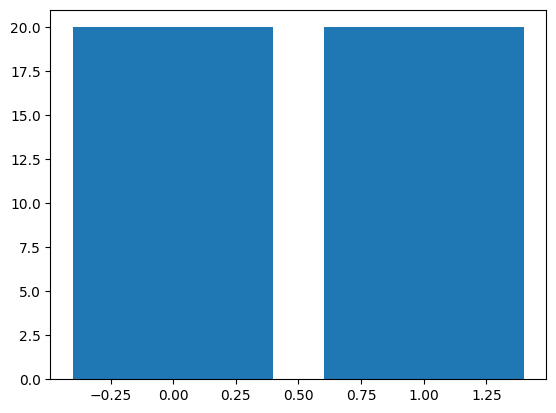

In [61]:
plt.bar(data_copy['Gender'], height = 20)

<Axes: >

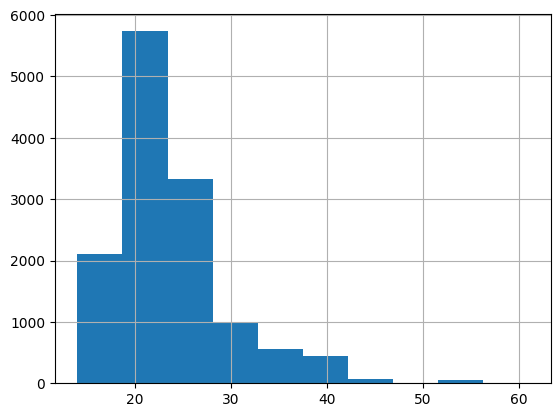

In [62]:
data_copy['Age'].hist()

<Axes: >

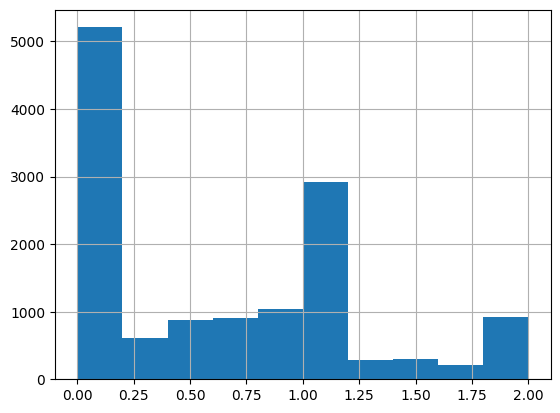

In [63]:
data_copy['TUE'].hist()

In [109]:
#import missingno as msno#
#msno.heatmap(data_copy)

In [64]:
from sklearn.impute import SimpleImputer, KNNImputer
median_imputer = SimpleImputer (strategy = 'median') 
knn_imputer = KNNImputer(n_neighbors=3)

In [70]:
features_median = data_copy.drop(['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad'], axis=1)
features_median

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
2,18.000000,NaN,50.165754,NaN,1.411685,NaN,0.866045,NaN
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,NaN,NaN,1.971472,NaN,1.967973,0.931721
5,18.128249,1.748524,51.552595,2.919751,3.000000,2.137550,1.930033,NaN
...,...,...,...,...,...,...,...,...
20752,40.000000,NaN,77.561602,NaN,NaN,1.131169,0.281734,0.522259
20753,NaN,NaN,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,NaN,1.971472,2.144838,0.000000,NaN


In [78]:
#data_copy.features_median = pd.DataFrame(median_imputer.fit_transform(data_copy.features_median))

In [79]:
data_copy[['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']] = knn_imputer.fit_transform(data_copy[['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']])
data_copy[['Age', 'Height','Weight'	,'FCVC'	,'NCP'	,'CH2O'	,'FAF',	'TUE']] = median_imputer.fit_transform(data_copy[['Age', 'Height','Weight'	,'FCVC'	,'NCP'	,'CH2O'	,'FAF',	'TUE']])


In [80]:
data_copy.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [ ]:
# sega vekje nema missing values i moze da se premine na reshavanje na modelot

## Feature Preprocessing

In [82]:
data_copy.FAF.unique().sum()

np.float64(1425.99007126)

In [84]:
from sklearn.model_selection import train_test_split

X = data_copy.drop(['FAF'],axis=1)
Y = data_copy.FAF


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [89]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

In [ ]:
##Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [87]:
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'max_depth' :[10,8,15]
}


In [85]:
from sklearn.model_selection import KFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [91]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model_xgb,param_grid=param_grid,cv=rkf)

cv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.9, 0.5],
                         'max_depth': [10, 8, 15]})

In [92]:
cv.best_score_

np.float64(0.3082409944000652)

In [93]:
model = cv.best_estimator_

In [94]:
y_pred = model.predict(X_test)

In [100]:

from sklearn.metrics import mean_absolute_error,r2_score
r2_score(y_test,y_pred)

0.3229251181466697

## Cross-validation evaluation

In [101]:
mean_absolute_error(y_test,y_pred)

np.float64(0.4957728098783151)

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error')
scores
#ova treba da go gledame kak apsolutni vrednosti oti gi dava u -. znaci -0.6 e 0.6 so znaci e blisko do 1 i modelo e los

array([-0.49780102, -0.51279684, -0.51424326, -0.50222995, -0.50645477])

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))